In [1]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn import datasets
from sklearn import model_selection
import numpy as np
import matplotlib as mp
import jupyter
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline

In [2]:
mem = Memory("./mycache")

@mem.cache
def get_data(mysvmlightfile):
    data = load_svmlight_file(mysvmlightfile)
    return data[0], data[1]

In [3]:
#读取数据集
x_train,y_train=get_data('a9a.txt')
x_test,y_test=get_data('a9a.t')

y_train=np.mat(y_train).T
y_test=np.mat(y_test).T

x_train=x_train.todense()
one=np.ones(x_train.shape[0])
x_train=np.column_stack((x_train,one))
x_test=x_test.todense()
zero=np.zeros(x_test.shape[0])
x_test=np.column_stack((x_test,zero))
one=np.ones(x_test.shape[0])
x_test=np.column_stack((x_test,one))

________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-Administrator-Desktop-机器学习实验课-ML2017-lab-01-master-ML2017-lab-02-master-__ipython-input__.get_data...
get_data('a9a.txt')
_________________________________________________________get_data - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-Administrator-Desktop-机器学习实验课-ML2017-lab-01-master-ML2017-lab-02-master-__ipython-input__.get_data...
get_data('a9a.t')
_________________________________________________________get_data - 0.1s, 0.0min


In [4]:
#参数全零初始化
w=np.zeros(x_train.shape[1])
w=np.mat(w)
w=w.T

In [5]:
#sgd
sgd_rate=0.0008
sgd_w=w


#momentum
momentum_gamma_w=0.9
momentum_rate=0.0005
momentum_v_w = 0
momentum_gamma_b=0.9
momentum_w=w


#NAG
nag_gamma_w=0.9
nag_rate=0.0005
nag_v_w = 0
nag_w=w

#adagred
adagrad_rate=0.02
adagrad_G_w=0
adagrad_epsilon=math.pow(np.e,-6)
adagrad_w=w

#rmsprop
rmsprop_rate=0.007
rmsprop_G_w=0
rmsprop_epsilon=math.pow(np.e,-6)
rmsprop_gamma_w=0.9
rmsprop_w=w

#adadelta
adadelta_G_w=0
adadelta_epsilon=math.pow(np.e,-6)
adadelta_gamma_w=0.09
adadelta_t_w=0
adadelta_w=w

#adam
adam_rate=0.01
adam_G_w=0
adam_epsilon=math.pow(np.e,-6)
adam_gamma_w=0.99
adam_w=w
adam_t_w=0
adam_m_w=0
adam_beta_w=0.9


In [6]:
#循环次数
time=0
c=0.9

In [7]:
#画图存数据的列表
time_list=[]
sgd_L_list=[]
momentum_L_list=[]
nag_L_list=[]
adagrad_L_list=[]
rmsprop_L_list=[]
adadelta_L_list=[]
adam_L_list=[]


选用svm线性模型yi=w.Txi+b,loss function=1/2 w.T w + cmax(0,1-yi(w.Txi+b))。 对w求梯度:当1-yi(w.Txi+b)>=0时，grad_w = w-c(yixi).T, 当1-yi(w.Txi+b)< 0时,grad_w=w. 对b求梯度，当1-yi(w.Txi+b)>=0时，grad_b = -cyi, 当1-yi(w.T*xi+b)< 0时,grad_b=0.
将b移入w矩阵，x数据增加一列全为1

In [8]:
while time<20:
    time = time + 1
    
    #sgd
    sgd_grad_w =0
    sgd_L_test =0
    for i in random.sample(range(x_train.shape[0]),10):
        if(1-(y_train[i]*(x_train[i]*sgd_w))>0):
            sgd_grad_w=sgd_grad_w+sgd_w-c*(y_train[i]*x_train[i]).T
        else:
            sgd_grad_w=sgd_grad_w+sgd_w
    sgd_w=sgd_w-sgd_rate*sgd_grad_w
    for i in range(x_test.shape[0]):
        if(1-y_test[i]*(x_test[i]*sgd_w)>0):
            sgd_L_test=sgd_L_test+(1-y_test[i]*(x_test[i]*sgd_w))
    sgd_L_test=0.5*sgd_w.T*sgd_w+c*sgd_L_test
    sgd_L_test=sgd_L_test/x_test.shape[0]
    print("epoch:",time)
    print("sgd_test_loss:",sgd_L_test)
    time_list.append(time)
    sgd_L_list.append(np.array(sgd_L_test)[0][0])

    #momentum
    momentum_grad_w = 0
    momentum_L_test = 0
    for i in random.sample(range(x_train.shape[0]), 10):
        if (1 - (y_train[i] * (x_train[i] * momentum_w)) > 0):
            momentum_grad_w = momentum_grad_w +momentum_w - c * (y_train[i] * x_train[i]).T
        else:
            momentum_grad_w = momentum_grad_w + momentum_w
    momentum_v_w = momentum_gamma_w * momentum_v_w + momentum_rate * momentum_grad_w
    momentum_w = momentum_w - momentum_v_w
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * momentum_w ) > 0):
            momentum_L_test = momentum_L_test + (1 - y_test[i] * (x_test[i] * momentum_w))
    momentum_L_test = 0.5 * momentum_w.T * momentum_w + c * momentum_L_test
    momentum_L_test = momentum_L_test / x_test.shape[0]
    print("momentum_test_loss:", momentum_L_test)
    momentum_L_list.append(np.array(momentum_L_test)[0][0])

    #NAG
    nag_grad_w = 0
    nag_L_test = 0
    for i in random.sample(range(x_train.shape[0]), 10):
        if (1 - (y_train[time] * (x_train[time] * nag_w )) > 0):
            nag_grad_w = nag_grad_w + (nag_w - nag_gamma_w * nag_v_w) - c * (y_train[time] * x_train[time]).T
        else:
            nag_grad_w = nag_grad_w + (nag_w - nag_gamma_w * nag_v_w)
    nag_v_w = nag_gamma_w * nag_v_w + nag_rate * nag_grad_w
    nag_w = nag_w - nag_v_w
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * nag_w ) > 0):
            nag_L_test = nag_L_test + (1 - y_test[i] * (x_test[i] * nag_w))
    nag_L_test = 0.5 * nag_w.T * nag_w + c * nag_L_test
    nag_L_test = nag_L_test / x_test.shape[0]
    print("nag_test_loss:", nag_L_test)
    nag_L_list.append(np.array(nag_L_test)[0][0])

    #adagrad
    adagrad_grad_w = 0
    adagrad_L_test = 0
    for i in random.sample(range(x_train.shape[0]), 10):
        if (1 - (y_train[i] * (x_train[i] * adagrad_w )) > 0):
            adagrad_grad_w = adagrad_grad_w + adagrad_w - c * (y_train[i] * x_train[i]).T

        else:
            adagrad_grad_w = adagrad_grad_w + adagrad_w
    adagrad_G_w = adagrad_G_w + np.array(adagrad_grad_w) * np.array(adagrad_grad_w)
    adagrad_w = adagrad_w - adagrad_rate * np.array(adagrad_grad_w) / np.sqrt(adagrad_G_w + adagrad_epsilon)
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * w ) > 0):
            adagrad_L_test = adagrad_L_test + (1 - y_test[i] * (x_test[i] * adagrad_w))
    adagrad_L_test = 0.5 * adagrad_w.T * adagrad_w + c * adagrad_L_test
    adagrad_L_test = adagrad_L_test / x_test.shape[0]
    print("adagrad_test_loss:", adagrad_L_test)
    adagrad_L_list.append(np.array(adagrad_L_test)[0][0])

    #rmsprop
    rmsprop_grad_w = 0
    rmsprop_L_test = 0
    for i in random.sample(range(x_train.shape[0]), 10):
        if (1 - (y_train[i] * (x_train[i] * rmsprop_w )) > 0):
            rmsprop_grad_w = rmsprop_grad_w + rmsprop_w - c * (y_train[i] * x_train[i]).T

        else:
            rmsprop_grad_w = rmsprop_grad_w + rmsprop_w
    rmsprop_G_w = rmsprop_G_w*rmsprop_gamma_w +np.array(rmsprop_grad_w) *np.array(rmsprop_grad_w)*(1-rmsprop_gamma_w)
    rmsprop_w = rmsprop_w - rmsprop_rate *rmsprop_grad_w / np.sqrt(rmsprop_G_w + rmsprop_epsilon)
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * rmsprop_w ) > 0):
            rmsprop_L_test = rmsprop_L_test + (1 - y_test[i] * (x_test[i] * rmsprop_w))
    rmsprop_L_test = 0.5 * rmsprop_w.T * rmsprop_w + c * rmsprop_L_test
    rmsprop_L_test = rmsprop_L_test / x_test.shape[0]
    print("rmsprop_test_loss:", rmsprop_L_test)
    rmsprop_L_list.append(np.array(rmsprop_L_test)[0][0])

    #adadelta
    adadelta_grad_w = 0
    adadelta_L_test = 0
    for i in random.sample(range(x_train.shape[0]), 10):
        if (1 - (y_train[i] * (x_train[i] * adadelta_w)) > 0):
            adadelta_grad_w = adadelta_grad_w + adadelta_w - c * (y_train[i] * x_train[i]).T

        else:
            adadelta_grad_w = adadelta_grad_w + adadelta_w
    adadelta_G_w = adadelta_G_w * adadelta_gamma_w + np.array(adadelta_grad_w) * np.array(adadelta_grad_w) * (1 - adadelta_gamma_w)
    adadelta_delta_w=-np.sqrt(adadelta_t_w+adadelta_epsilon)/np.sqrt(adadelta_G_w+adadelta_epsilon) * 0.1*np.array(adadelta_grad_w)
    adadelta_w = adadelta_w +adadelta_delta_w
    adadelta_t_w = adadelta_gamma_w * adadelta_t_w + (1 - adadelta_gamma_w) * np.array(adadelta_delta_w) * np.array(adadelta_delta_w)
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * adadelta_w ) > 0):
            adadelta_L_test = adadelta_L_test + (1 - y_test[i] * (x_test[i] * adadelta_w))
    adadelta_L_test = 0.5 * adadelta_w.T * adadelta_w + c * adadelta_L_test
    adadelta_L_test = adadelta_L_test / x_test.shape[0]
    print("adadelta_test_loss:", adadelta_L_test)
    adadelta_L_list.append(np.array(adadelta_L_test)[0][0])

    #adam
    adam_grad_w = 0
    adam_L_test = 0
    for i in random.sample(range(x_train.shape[0]), 10):
        if (1 - (y_train[time] * (x_train[time] * adam_w)) > 0):
            adam_grad_w =adam_grad_w + adam_w - c * (y_train[time] * x_train[time]).T
        else:
            adam_grad_w = adam_grad_w + adam_w
    adam_m_w = adam_beta_w * adam_m_w + (1 - adam_beta_w) * adam_grad_w
    adam_G_w = adam_G_w * adam_gamma_w + np.array(adam_grad_w) * np.array(adam_grad_w) * (1 -adam_gamma_w)
    adam_alpha_w = adam_rate * math.sqrt(1 - math.pow(adam_gamma_w, time)) / (1 - math.pow(adam_beta_w, time))
    adam_w = adam_w - adam_alpha_w*adam_m_w/np.sqrt(adam_G_w+adam_epsilon)
    for i in range(x_test.shape[0]):
        if (1 - y_test[i] * (x_test[i] * adam_w ) > 0):
            adam_L_test = adam_L_test + (1 - y_test[i] * (x_test[i] * adam_w))
    adam_L_test = 0.5 * adam_w.T * adam_w + c * adam_L_test
    adam_L_test = adam_L_test / x_test.shape[0]
    print("adam_test_loss:", adam_L_test)
    adam_L_list.append(np.array(adam_L_test)[0][0])

epoch: 1
sgd_test_loss: [[ 0.88042405]]
momentum_test_loss: [[ 0.8926702]]
nag_test_loss: [[ 0.88668309]]
adagrad_test_loss: [[ 0.78906696]]
rmsprop_test_loss: [[ 0.78903459]]
adadelta_test_loss: [[ 0.86685208]]
adam_test_loss: [[ 0.87045208]]
epoch: 2
sgd_test_loss: [[ 0.8841186]]
momentum_test_loss: [[ 0.87557278]]
nag_test_loss: [[ 0.85693164]]
adagrad_test_loss: [[ 0.77559389]]
rmsprop_test_loss: [[ 0.76404839]]
adadelta_test_loss: [[ 0.84229404]]
adam_test_loss: [[ 0.83143903]]
epoch: 3
sgd_test_loss: [[ 0.87833239]]
momentum_test_loss: [[ 0.84757171]]
nag_test_loss: [[ 0.81617928]]
adagrad_test_loss: [[ 0.70011526]]
rmsprop_test_loss: [[ 0.69651731]]
adadelta_test_loss: [[ 0.81534707]]
adam_test_loss: [[ 0.79281507]]
epoch: 4
sgd_test_loss: [[ 0.85654508]]
momentum_test_loss: [[ 0.81529344]]
nag_test_loss: [[ 0.7682237]]
adagrad_test_loss: [[ 0.63940287]]
rmsprop_test_loss: [[ 0.65680159]]
adadelta_test_loss: [[ 0.78326329]]
adam_test_loss: [[ 0.75458193]]
epoch: 5
sgd_test_loss:

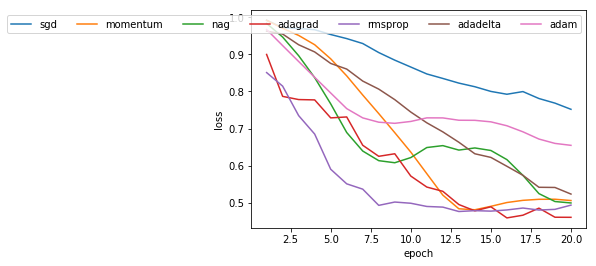

In [30]:
#画图
plt.xlabel('epoch')
plt.ylabel('loss')
line1=plt.plot(time_list,sgd_L_list)
line2=plt.plot(time_list,momentum_L_list)
line3=plt.plot(time_list,nag_L_list)
line4=plt.plot(time_list,adagrad_L_list)
line5=plt.plot(time_list,rmsprop_L_list)
line6=plt.plot(time_list,adadelta_L_list)
line7=plt.plot(time_list,adam_L_list)
label = ["sgd","momentum","nag","adagrad","rmsprop","adadelta","adam"]
plt.legend(label, loc = 0, ncol = 7)
plt.show()